In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv('/content/drive/MyDrive/tickets.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5446 entries, 0 to 5445
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ticket  5446 non-null   object
dtypes: object(1)
memory usage: 42.7+ KB


No empty tickets

In [5]:
data.sample(10)

,ticket
3400,"iad2-tegna-dmvpn1.tgna.tegna.com: IPSLA: [201] DFW1-TEGNA-DMVPN2_XO: Packet Loss Above minor threshold 2.5%, currently 2.6%"
1501,MECATLWSQL02.MECQTS.qts: System or agent has recently restarted
2231,etm-priwodb02.tgna.tegna.com: System or agent has recently restarted
3395,VAQUVAPAAW27: Device Failed Availability Check: Component device 10242 is not available
242,ATL-NELLC-N9K-1: Device Failed Availability Check: UDP - SNMP
3315,ORCRICVMWSTA04: System or agent has recently restarted
2699,vaqavapibx42: Device Failed Availability Check: Component device 10071 is not available ; Reason: At least one ancestor of vaqavapibx42 (ID=> 10071) has been ma
19,iad1-p04-p-ap08: Required service not running: Tax Calculator
931,sdbc1_ecp_helsinki_approved: Device Failed Availability Check: Component device 49650 is not available ; Reason: At least one ancestor of sdbc1_ecp_helsinki_app
2736,"METRICSTREAM-SW01.SJC1.GDT.com: Interface state changed to operationally down: 526582848, Name: Ethernet100/1/18 Ethernet100/1/18; previous state was up (1)"


Ticket mostly have structure like Name:Error

Let's have a look at tickets length

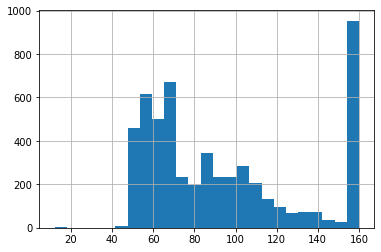

In [6]:
data['length'] = data['ticket'].apply(len)
data.length.hist(bins=25)

Not so far from normal distribution, except for lenght 160 and a group between 50 and 70

Looks like 160 characters is set as maximum length of a ticket

In [7]:
data[data.length==data.length.max()].sample(10)

,ticket,length
4422,dswcentral_cache: Device Failed Availability Check: Component device 54334 is not available ; Reason: At least one ancestor of dswcentral_cache (ID=> 54334) has,160
4953,sdbsap_ecc: Device Failed Availability Check: Component device 52896 is not available ; Reason: At least one ancestor of sdbsap_ecc (ID=> 52896) has been marked,160
2847,datastore1 (4): Device Failed Availability Check: Component device 4082 is not available (datastore1 (4)); Reason: Availability App ID: 244 running on parent D,160
1946,db21_oracle: Device Failed Availability Check: Component device 18513 is not available ; Reason: At least one ancestor of db21_oracle (ID=> 18513) has been mark,160
2653,vaqwvapscm01: Device Failed Availability Check: Component device 11922 is not available (vaqwvapscm01); Reason: Availability App ID: 228 running on parent DID,160
4199,iad1-p04-p-db01: Host Resource: Storage Utilization (H:\\ Label:Write Data Serial Number f6b319cf) of type HrStorageFixedDisk has exceeded critical threshold 9,160
1731,dfw1-tegna-wo-esx03.tgna.tegna.com: Device Failed Availability Check: Component device 4131 is not available ; Reason: At least one ancestor of dfw1-tegna-wo-es,160
1519,VAQUVAPAAW26: Device Failed Availability Check: Component device 10248 is not available (VAQUVAPAAW26); Reason: Availability App ID: 228 running on parent DID,160
1796,DGE: Device Failed Availability Check: Component device 19398 is not available ; Reason: At least one ancestor of DGE (ID=> 19398) has been marked as unavailabl,160
3677,eit-mocexrly01.tgna.tegna.com: Host Resource: Storage Utilization (C:\\ Label: Serial Number be0ee50e) of type HrStorageFixedDisk has exceeded critical thresho,160


Yes, these ticket are cut at the end

Also we have a small group of short tickets

In [8]:
data[data.length<30]

,ticket,length
2169,BGP Tunnels down,16
2517,BGP is down.,12
3886,BGP TUNNEL DOWN - TMDATA,24


Check if they are just a part of their neighbourgs

In [9]:
data.iloc[2516:2519]

,ticket,length
2516,etm-priwomsrd06.tgna.tegna.com: System or agent has recently restarted,70
2517,BGP is down.,12
2518,etm-priwomsrd04.tgna.tegna.com: System or agent has recently restarted,70


Maybe all tickets considering BGP are short or special?

In [10]:
pattern = r"BGP"
data[data['ticket'].str.contains(pattern)]

,ticket,length
12,DFW1-TEGNA-DMVPN1.tgna.tegna.com: Cisco: BGP Peers (216.200.132.68) Peer state is not established and Prior state was established,129
119,DFW1-TEGNA-DMVPN2.tgna.tegna.com: Cisco: BGP Peers (172.17.105.73) Peer state is not established and Prior state was established,128
352,cons-mi-03-ba.lumin.digital: Cisco: BGP Peers (172.27.0.1) Peer state is not established and Prior state was established,120
885,acu-tx-02-pr.lumin.digital: Cisco: BGP Peers (172.27.0.26) Peer state is not established and Prior state was established,120
987,parkmobile-fw-fe02: BGP remote IP (10.200.0.17) Peer Admin Status has changed from start to stop,96
1180,TRANSIT-VPC-CSR2.us-west-2.compute.internal: Cisco: BGP Peers (172.27.0.61) Peer state is not established and Prior state was established,137
1449,parkmobile-fw-be02: BGP remote IP (169.254.255.17) Peer state is not established and Prior state was established,112
1520,parkmobile-fw-be02: BGP remote IP (169.254.255.5) Peer state is not established and Prior state was established,111
1651,hfcu-vt-03-ba.lumin.digital: Cisco: BGP Peers (172.27.0.17) Peer state is not established and Prior state was established,121
1661,parkmobile-fw-fe02: BGP remote IP (10.201.0.17) Peer state is not established and Prior state was established,109


Nope. But "ASHBURN BGP Tunnel Down (COTAS" looks cut

In [11]:
data.iloc[4016:4019]

,ticket,length
4016,VAQUVAPCOM84: Device Failed Availability Check: Component device 10343 is not available,87
4017,ASHBURN BGP Tunnel Down (COTAS,30
4018,ORCRICVMWTRA01: System or agent has recently restarted,54


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer(ngram_range=(1, 4), min_df=0.03, max_df=0.95, lowercase=False)
vectors = vectorizer.fit_transform(data.ticket)
vectors.shape

(5446, 256)

In [14]:
vectors[0]

<1x256 sparse matrix of type '<class 'numpy.float64'>'
	with 31 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 16, init='k-means++', random_state=99)
model.fit(vectors)

KMeans(n_clusters=16, random_state=99)

In [16]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [17]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(vectors, labels, metric='euclidean')

In [18]:
silhouette_score

0.5872229642637729

In [19]:
data['label'] = labels
for i in range(data['label'].nunique()):
    print(data[data['label']==i][['ticket','label']].sample(5))

                                                                                                                                                                ticket  \
585   VAQUVAPCOM81: Device Failed Availability Check: Component device 10340 is not available  (VAQUVAPCOM81); Reason: Availability App ID: 228 running on parent DID    
5188  VAQUVATAAW36: Device Failed Availability Check: Component device 10403 is not available  (VAQUVATAAW36); Reason: Availability App ID: 228 running on parent DID    
160   VAQUVAPNJS26: Device Failed Availability Check: Component device 10046 is not available  (VAQUVAPNJS26); Reason: Availability App ID: 228 running on parent DID    
1404  VAQUVAPCOM75: Device Failed Availability Check: Component device 9948 is not available  (VAQUVAPCOM75); Reason: Availability App ID: 228 running on parent DID 9   
1216  spl_non-prod_ds_ps: Device Failed Availability Check: Component device 9813 is not available  (spl_non-prod_ds_ps); Reason: Availability App ID:

Some groups are well-labeled (0, 1, 3, 4, 6, 7, 8), but some are not. Looks like we need some more groups

In [20]:
model = KMeans(n_clusters = 56, init='k-means++')
model.fit(vectors)
labels = model.labels_
cluster_center=model.cluster_centers_

In [21]:
silhouette_score = metrics.silhouette_score(vectors, labels, metric='euclidean')
silhouette_score

0.7557059070609877

In [22]:
data['label'] = labels
for i in range(data['label'].nunique()):
    print(data[data['label']==i][['ticket','label']].sample(5))

                                                                                           ticket  \
4698     iad01vm28-05: Host Resource: CPU has exceeded threshold 90%. The current value is 94.0%.   
4096     iad01vm21-02: Host Resource: CPU has exceeded threshold 90%. The current value is 96.0%.   
1096  iad1-p03-p-ap26: Host Resource: CPU has exceeded threshold 90%. The current value is 99.0%.   
5220  iad1-p04-p-ap10: Host Resource: CPU has exceeded threshold 90%. The current value is 96.0%.   
4644  phx1-p03-p-ap01: Host Resource: CPU has exceeded threshold 95%. The current value is 96.0%.   

      label  
4698      0  
4096      0  
1096      0  
5220      0  
4644      0  
                                                                                                                                                                ticket  \
1510  sys/chassis-1/blade-6: Device Failed Availability Check: Component device 3948 is not available ; Reason: At least one ancestor of sy

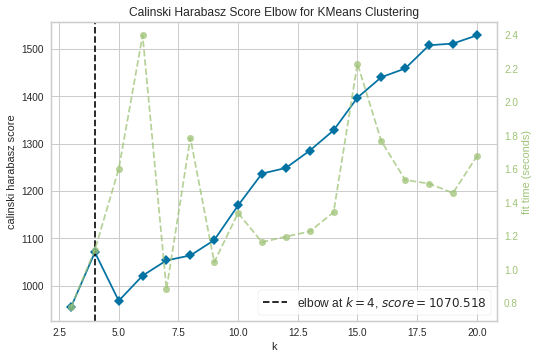

In [23]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(3,21), metric='calinski_harabasz', timings= True)
vectors=vectors.toarray()
visualizer.fit(vectors)       
visualizer.show()       

In [26]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
wnl = nltk.WordNetLemmatizer()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

stopWords = stopwords.words('english')

def preproc_nltk(text):
    text = re.sub(f'[{string.punctuation}]', ' ', text)
    return ' '.join([wnl.lemmatize(word) for word in word_tokenize(text.lower()) if word not in stopWords])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [27]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=0.06, lowercase=False, preprocessor=preproc_nltk)
vectors = vectorizer.fit_transform(data.ticket)
vectors.shape

(5446, 86)

In [28]:
model = KMeans(n_clusters = 56, init='k-means++')
model.fit(vectors)
labels = model.labels_
cluster_center=model.cluster_centers_
silhouette_score = metrics.silhouette_score(vectors, labels, metric='euclidean')
silhouette_score

0.8193937487994858

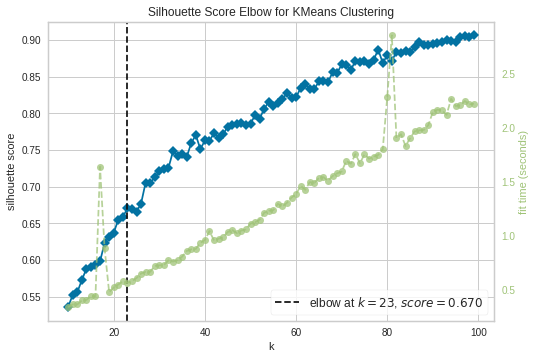

In [29]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(10,100), metric='silhouette', timings= True)
visualizer.fit(vectors)       
visualizer.show()       

In [30]:
model = KMeans(n_clusters = 60, init='k-means++')
model.fit(vectors)
labels = model.labels_
cluster_center = model.cluster_centers_
data['label'] = labels
for i in range(data['label'].nunique()):
    print(data[data['label']==i].sample(5))

                                                            ticket  length  \
3250       natfert-db: Device Failed Availability Check: ICMP Ping      55   
322       genpact-app: Device Failed Availability Check: ICMP Ping      56   
1751  db21.qa.nec.com: Device Failed Availability Check: ICMP Ping      60   
1890     vaquvatcom53: Device Failed Availability Check: ICMP Ping      57   
4821      10.40.2.217: Device Failed Availability Check: ICMP Ping      56   

      label  
3250      0  
322       0  
1751      0  
1890      0  
4821      0  
                                                                      ticket  \
3287  ETM-PRICTXVDA04.tgna.tegna.com: System or agent has recently restarted   
349   etm-priwomsrd03.tgna.tegna.com: System or agent has recently restarted   
4949  etm-priwomsrd03.tgna.tegna.com: System or agent has recently restarted   
4608  etm-priwomsrd03.tgna.tegna.com: System or agent has recently restarted   
4637  etm-priwobxf202.tgna.tegna.com: System or

ValueError: ignored

What if to separate name and ticket text

In [31]:
data['name'] = data['ticket'].apply(lambda x: re.search('^(.*?): ', x).group(0) if re.search('^(.*?): ', x) else None)

In [32]:
data.head()

,ticket,length,label,name
0,eit-prismadm01.tgna.tegna.com: System or agent has recently restarted,69,45,eit-prismadm01.tgna.tegna.com:
1,"ATL-NELLC-N9K-2: Interface state changed to operationally down: 436212736, Name: Ethernet1/11 P950-3_C6-1; previous state was up (1)",133,5,ATL-NELLC-N9K-2:
2,vaqupdtoms01: Device Failed Availability Check: UDP - SNMP,58,14,vaqupdtoms01:
3,"test-vm-01: VMware: VM CPU Usage Has Exceeded Threshold (95%), currently (100.0%)",81,12,test-vm-01:
4,NTNX-local-ds-19SM6J290326-B: Device Failed Availability Check: Component device 9872 is not available (NTNX-local-ds-19SM6J290326-B); Reason: Availability App,160,38,NTNX-local-ds-19SM6J290326-B:


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5446 entries, 0 to 5445
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ticket  5446 non-null   object
 1   length  5446 non-null   int64 
 2   label   5446 non-null   int32 
 3   name    5439 non-null   object
dtypes: int32(1), int64(1), object(2)
memory usage: 149.0+ KB


In [34]:
data[data.name.isna()]

,ticket,length,label,name
2169,BGP Tunnels down,16,37,None
2517,BGP is down.,12,37,None
3867,VIVO & SAO PAULO Brazil BGP neighbors not forming neighbors,59,37,None
3886,BGP TUNNEL DOWN - TMDATA,24,37,None
3927,Critical - BGP tunnels for various carriers down,48,24,None
4017,ASHBURN BGP Tunnel Down (COTAS,30,37,None
4666,"Need confirmation on ""DOWN"" BGP tunnels in Ashburn data center",62,37,None


In [35]:
data.name.nunique()

2123

In [36]:
data['ticket_wo_name'] = data['ticket'].apply(lambda x: x[x.find(':')+1:])

In [37]:
def preproc_nltk_noname(text):
    text = re.sub(f'[{string.punctuation}]', ' ', text)
    text = re.sub('^(.*?): ', '', text, 1)
    return ' '.join([wnl.lemmatize(word) for word in word_tokenize(text.lower()) if word not in stopWords])

In [38]:
data.ticket_wo_name.value_counts()

 System or agent has recently restarted                                                                                                                860
 Required service not running: Tomcat7                                                                                                                 592
 Device Failed Availability Check: UDP - SNMP                                                                                                          432
 Device Failed Availability Check: ICMP Ping                                                                                                           117
 Host Resource: CPU has exceeded threshold 90%. The current value is 99.0%.                                                                             69
                                                                                                                                                      ... 
 Device Failed Availability Check: Component device 10337 is not avail

In [40]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=0.06, max_df = 0.95, lowercase=False, preprocessor=preproc_nltk_noname)
vectors = vectorizer.fit_transform(data.ticket_wo_name)
vectors.shape

(5446, 74)

In [41]:
model = KMeans(n_clusters = 18, init='k-means++')
model.fit(vectors)
labels = model.labels_
cluster_center = model.cluster_centers_
data['label'] = labels
for i in range(data['label'].nunique()):
    print(data[data['label']==i].sample(5))

                                                                                                                                                                ticket  \
2122  tempdb: Device Failed Availability Check: Component device 18417 is not available ; Reason: At least one ancestor of tempdb (ID=> 18417) has been marked as unav   
1492  psaHarmonization: Device Failed Availability Check: Component device 22417 is not available ; Reason: At least one ancestor of psaHarmonization (ID=> 22417) has   
4835  VAQUVADKAF04: Device Failed Availability Check: Component device 13952 is not available ; Reason: At least one ancestor of VAQUVADKAF04 (ID=> 13952) has been ma   
1781  360iadesx07.i360mgmt.qts: Device Failed Availability Check: Component device 4024 is not available ; Reason: At least one ancestor of 360iadesx07.i360mgmt.qts (   
2880  MC: Device Failed Availability Check: Component device 18409 is not available ; Reason: At least one ancestor of MC (ID=> 18409) has been marked

/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning: Number of distinct clusters (94) found smaller than n_clusters (95). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning: Number of distinct clusters (94) found smaller than n_clusters (96). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning: Number of distinct clusters (94) found smaller than n_clusters (97). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning: Number of distinct clusters (94) found smaller than n_clusters (98). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/e

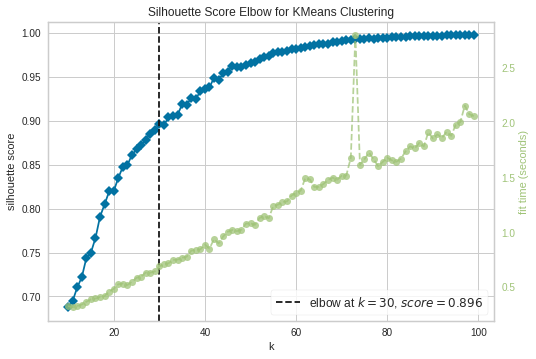

In [42]:
model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(10, 100),metric='silhouette', timings= True)
visualizer.fit(vectors)       
visualizer.show()  

In [43]:
model = KMeans(n_clusters = 232, init='k-means++')
model.fit(vectors)
labels = model.labels_
cluster_center = model.cluster_centers_
data['label'] = labels
for i in range(data['label'].nunique()):
    print(data[data['label']==i].sample())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ConvergenceWarning: Number of distinct clusters (94) found smaller than n_clusters (232). Possibly due to duplicate points in X.
  


                                                               ticket  length  \
4924  360IADVDEVRPT2.i360.qts: System or agent has recently restarted      63   

      label                       name  \
4924      0  360IADVDEVRPT2.i360.qts:    

                               ticket_wo_name  
4924   System or agent has recently restarted  
                                                                                                                                                                ticket  \
4337  TGNA-ETM-PURE-FC-LUN13: Device Failed Availability Check: Component device 4101 is not available  (TGNA-ETM-PURE-FC-LUN13); Reason: Availability App ID: 244 run   

      length  label                      name  \
4337     160      1  TGNA-ETM-PURE-FC-LUN13:    

                                                                                                                                 ticket_wo_name  
4337   Device Failed Availability Check: Component device 4101 is not 

In [44]:
text = " ".join(ticket.split()[1] for ticket in data.ticket)

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [46]:
wordcloud = WordCloud().generate(text)

(-0.5, 399.5, 199.5, -0.5)

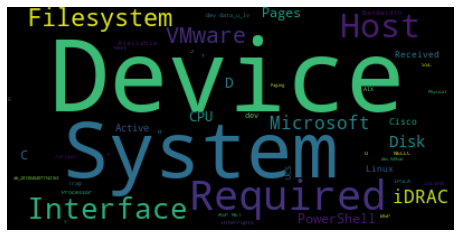

In [47]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")